In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Salary_Data.csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.columns = df.columns.str.strip()
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Axes: >

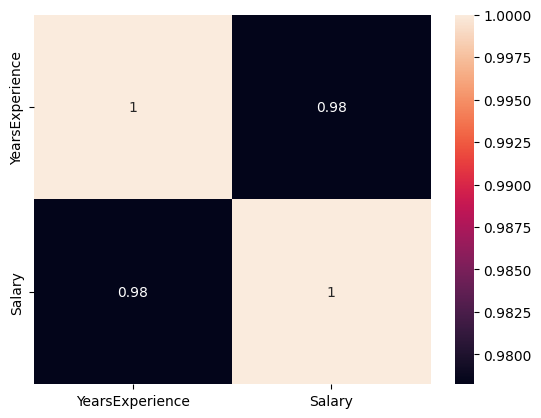

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
x = df['YearsExperience']
y = df['Salary']

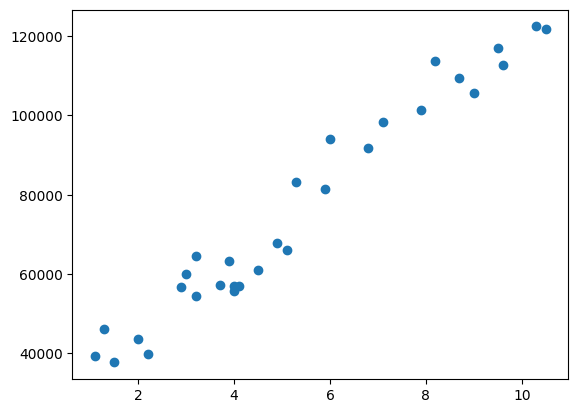

In [ ]:
plt.scatter(x,y)
plt.show()

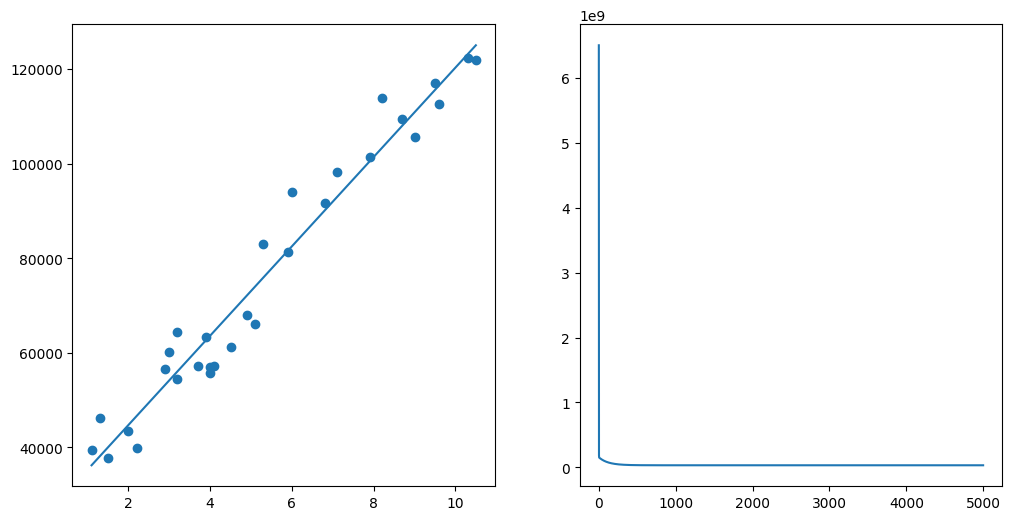

In [ ]:
m = 0
b = 0
lr = 0.01
epochs = 5000
n = float(x.shape[0])
error = []
for i in range(epochs):
  yi = m*x+b
  mse = (1/n)*np.sum((y-yi)**2)
  error.append(mse)

  dm = (-2/n)*np.sum(x*(y-yi))
  db = (-2/n)*np.sum(y-yi)

  m = m-lr*dm
  b = b-lr*db

x_line = np.linspace(np.min(x), np.max(x), 100)
y_line = m*x_line+b


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(x_line, y_line)
plt.scatter(x,y)

plt.subplot(1,2,2)
plt.plot(error)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
x = df['YearsExperience']
y = df['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df['YearsExperience'] = df['YearsExperience'].astype(int)

In [ ]:
df['Salary'] = df['Salary'].astype(int)

In [ ]:
model = LinearRegression()
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9024461774180497
